## Data Requirements

We want to know the rain measurements from a recent period of time. We can check multiple data sources, however since KNMI is the most trusted data source, we will for now look at this data source only. 

#### KNMI
Also Koninklijk Nederlands Meteorologisch Instituut or Royal Dutch Meteorological Institute is a Dutch national weather service. The main task of KNMI is to forecast weather and to monitor the weather, climate, air quality and seismic activity (related to earthquakes). With the knowledge they have, they try to reduce risks in the field of weather, climate and seismology and try to limit damage and injuries.

We expect to have a datapoint for each day, we don't want to have any missing values. <br>
As we want to check how much it rained on days within the period 01-01-2018 until 27-05-2022, we would need features such as precipitation and date. Besides that we do not really need any other features.

KNMI receives the data from the measure stations and weather stations throughout the country. They share the data, to give advice to others. In extreme cases, such as storms, it is important to stay up to date so people will stay safe. For example, they work together with ProRail, a company that is responsible for the maintenance, renewal, expansion and safety of the Dutch railway network. In case severe weather is predicted, they will decide to change timetable for trains.
Waarom heeft KNMI die data, waarom zouden zij die data geven. zij zijn een instituut die hier op focust.

## Data Collection

We are going to look at the rain measurements from January 1st 2018 until May 27th 2022. We want to find out if the rain has an affect on the traffic jams and roadworks. The data we are looking at is from <a href="https://daggegevens.knmi.nl/">KNMI</a>. For now we will only look at the weather station in Eindhoven. Since we look at the rain we chose RHX and RHXH. 

If there is enough time, we will also look at traffic jams and check if there is correlation between the rain measurements and the traffic jams. The data for traffic jams is in another file.

## Data Understanding

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We chose for now only Eindhoven. The number of the weather station is 370. We skipped the first 9 rows, since these rows are not useful as they are just explaining what each column stands for and some other comments. 

In [142]:
rain = pd.read_excel("Rain measurements.xlsx", skiprows = 9)
rain

,# STN,YYYYMMDD,RHX,RHXH
0,370,20180101,21,16
1,370,20180102,10,5
2,370,20180103,37,4
3,370,20180104,5,15
4,370,20180105,10,4
...,...,...,...,...
1603,370,20220523,83,17
1604,370,20220524,31,13
1605,370,20220525,-1,1
1606,370,20220526,0,1


In [143]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   # STN     1608 non-null   int64
 1   YYYYMMDD  1608 non-null   int64
 2     RHX     1608 non-null   int64
 3    RHXH     1608 non-null   int64
dtypes: int64(4)
memory usage: 50.4 KB


The names of the columns have spaces in front, so this needs to be fixed for sure. But since the names are not really understandable, we will also change the names.

In [144]:
rain ['# STN'].unique()

array([370], dtype=int64)

As predicted the only value is 370, since we only look at the weather station in Eindhoven. We will change this to categorical because then the only value could be 370 or null, when a new row is added.

In [145]:
rain[rain['YYYYMMDD'].duplicated() == True]

,# STN,YYYYMMDD,RHX,RHXH


We want to know if the date column has any duplicate values, when checking there are no duplicate values. This means there is no date duplicate in the dataframe and since there are no missing values, we know that the dates range from 01-01-2018 until 27-05-2022.

In [146]:
rain['  RHX'].unique()

array([ 21,  10,  37,   5,   4,   0,  -1,   9,  28,  24,  20,  22,   6,
        12,  33,   3,  16, 105,  17,   8,   2,  13,  14,  18,  11,  26,
        15,   1, 101,  46,  72,  53, 141,  74,  57,  39,  34,  29,  54,
         7,  58,  35,  85,  30,  38,  36,  23,  25,  89,  65, 120, 124,
        77,  27,  31,  48,  69,  19,  56,  59, 102,  40,  61, 126, 178,
        52,  97,  32,  43,  42, 167,  55,  45,  88,  49, 136, 153, 158,
        41,  50,  51,  83], dtype=int64)

In [147]:
rain[' RHXH'].unique()

array([16,  5,  4, 15, 14,  1,  8, 21, 10, 23, 13, 22,  3, 18, 11, 12, 19,
       20,  6, 17,  2,  7, 24,  9], dtype=int64)

These values are only hours. This could be categorical, since these values occur multiple times. There cannot be any other values than 1-24, since these are the only hours in a day.
Since we are only interested in the working times, we will replace all values of precipitation to 0, for the times after 18.00 (6 PM) and before 8.00 (8 AM). We will not remove these rows, since this might cause problems later.

There are 4 columns with in total 1608 rows. We chose the dates ourselves so we could extend the dataset even more, if we want to we can extend it. 

<b>#STN</b><br>
Stands for the weather station number. This should be 370 for each row, since we only look at Eindhoven. <br>
Datatype is int64 - change to category<br>
1608 non-null values<br>

<b>YYYYMMDD</b><br>
The day the rain was measured.<br>
Datatype is int64 - change to datetime<br>
1608 non-null values<br>

<b>RHX</b><br>
Maximum hourly precipitation amount (in 0.1 mm). If a value in the column is -1, this means there was less than 0.05mm percipitation.<br>
Datatype is int64<br>
1608 non-null values<br>

<b>RHXH</b><br>
Hourly division in which the maximum hourly precipitation is measured.<br>
Datatype is int64<br>
1608 non-null values

In [148]:
rain.describe()

,# STN,YYYYMMDD,RHX,RHXH
count,1608.0,1.608000e+03,1608.000000,1608.000000
mean,370.0,2.019792e+07,7.703358,6.269900
std,0.0,1.281200e+04,17.348715,7.409981
min,370.0,2.018010e+07,-1.000000,1.000000
25%,370.0,2.019021e+07,0.000000,1.000000
50%,370.0,2.020031e+07,0.000000,1.000000
75%,370.0,2.021042e+07,9.000000,12.000000
max,370.0,2.022053e+07,178.000000,24.000000


In [149]:
rain[rain['  RHX'] == 178]

,# STN,YYYYMMDD,RHX,RHXH
898,370,20200617,178,17


We checked <a href="https://weerstatistieken.nl/eindhoven/2020/juni">Weerstatistieken</a> to double check if the data is the same, this is exactly true. However, they used the data from KNMI, so this is unfortunately not as useful as hoped.

In [150]:
# datetime as index (to filter on worktimes)

In [151]:
year_2018 = rain[(rain['YYYYMMDD'] >= 20181231)]
year_2019 = rain[(rain['YYYYMMDD'] >= 20190101) & (rain['YYYYMMDD'] <= 20191231)]
year_2020 = rain[(rain['YYYYMMDD'] >= 20200101) & (rain['YYYYMMDD'] <= 20201231)]
year_2021 = rain[(rain['YYYYMMDD'] >= 20210101) & (rain['YYYYMMDD'] <= 20211231)]
year_2022 = rain[(rain['YYYYMMDD'] >= 20220101)]

We created new dataframes for each year, so that it is easier to check data per year. This way we can also check if there are similarities per year.

<AxesSubplot:xlabel='YYYYMMDD'>

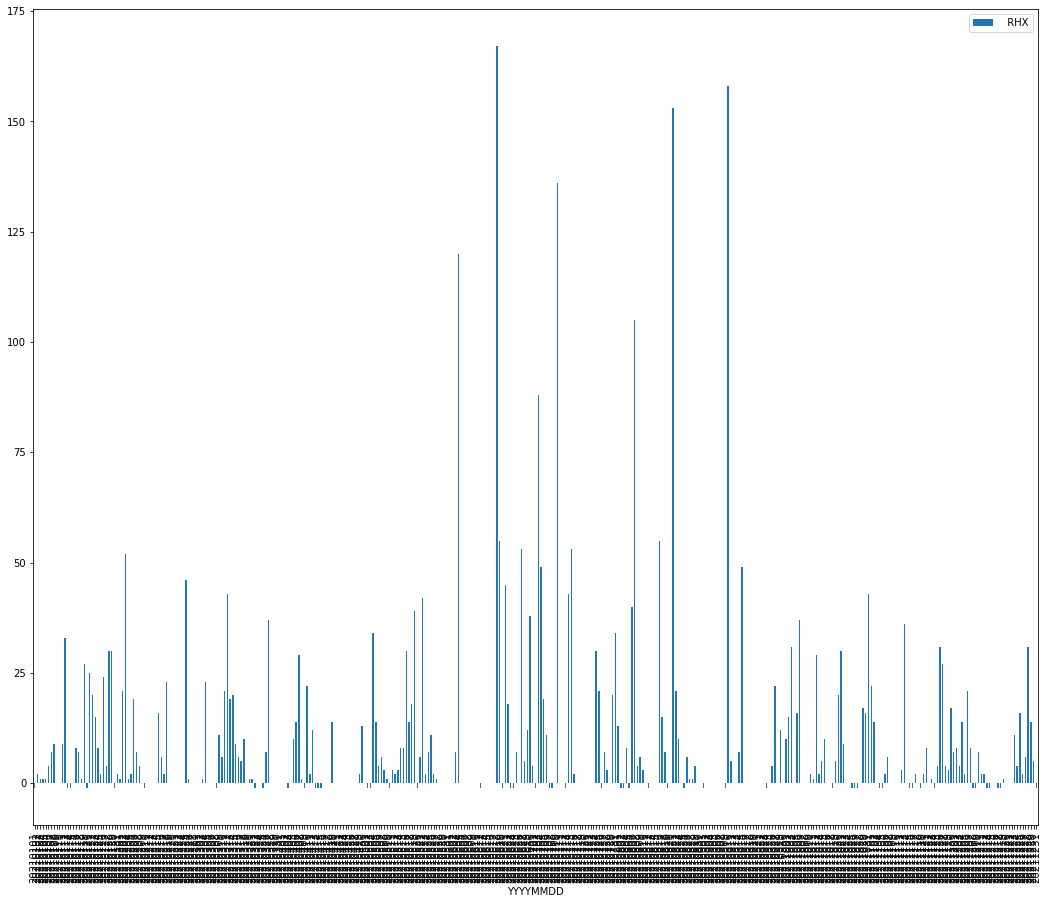

In [152]:
year_2021.plot.bar(x='YYYYMMDD', y='  RHX', figsize=(18,15))

<AxesSubplot:xlabel='YYYYMMDD'>

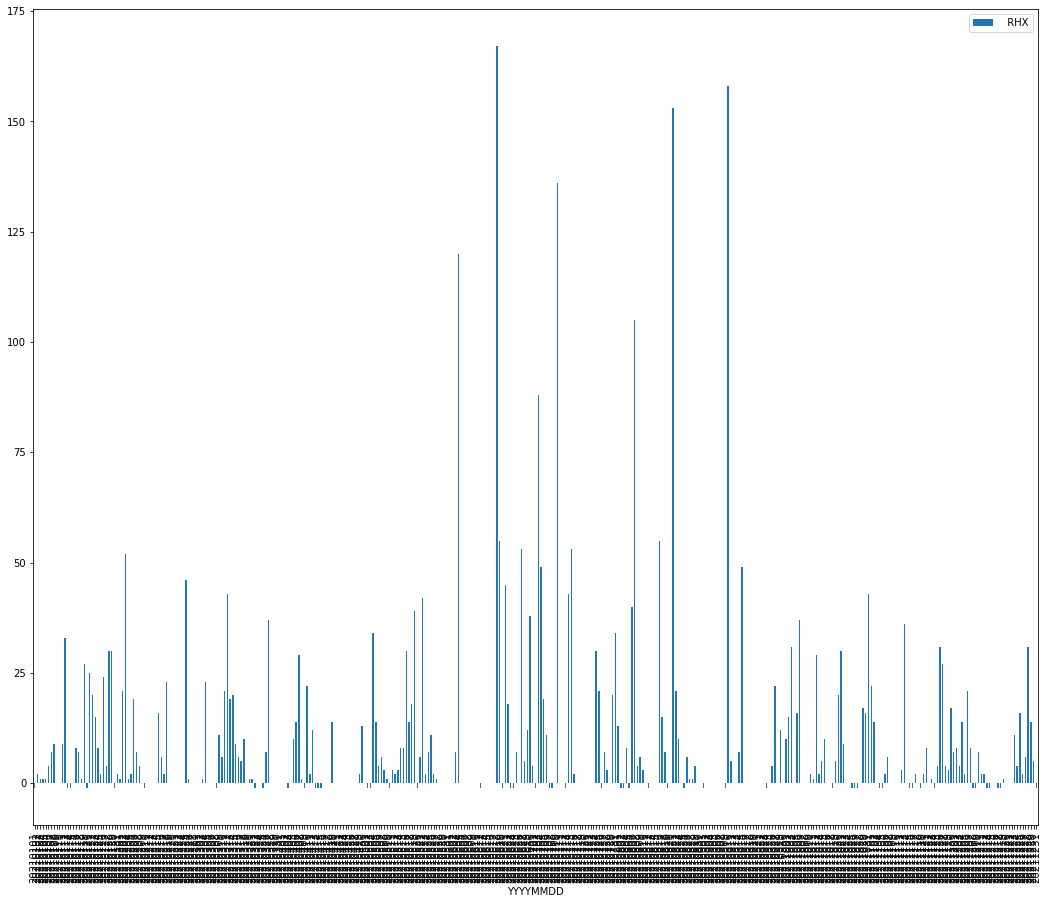

In [153]:
year_2021.plot.bar(x='YYYYMMDD', y='  RHX', figsize=(18,15))

Since the dataframe is filtered on each year, it is better visible. But we still cannot see the dates, so we filter again into periods of 4 months. It is best to check the data from 2021, since that is where we have the most data with Traffic Jams.

In [154]:
jan_apr_2021 = year_2021[(year_2021['YYYYMMDD'] >= 20210101) & (year_2021['YYYYMMDD'] <= 20210430)]
may_aug_2021 = year_2021[(year_2021['YYYYMMDD'] >= 20210501) & (year_2021['YYYYMMDD'] <= 20210831)]
sep_dec_2021 = year_2021[(year_2021['YYYYMMDD'] >= 20210901) & (year_2021['YYYYMMDD'] <= 20211231)]

Text(0.5, 0, 'Date')

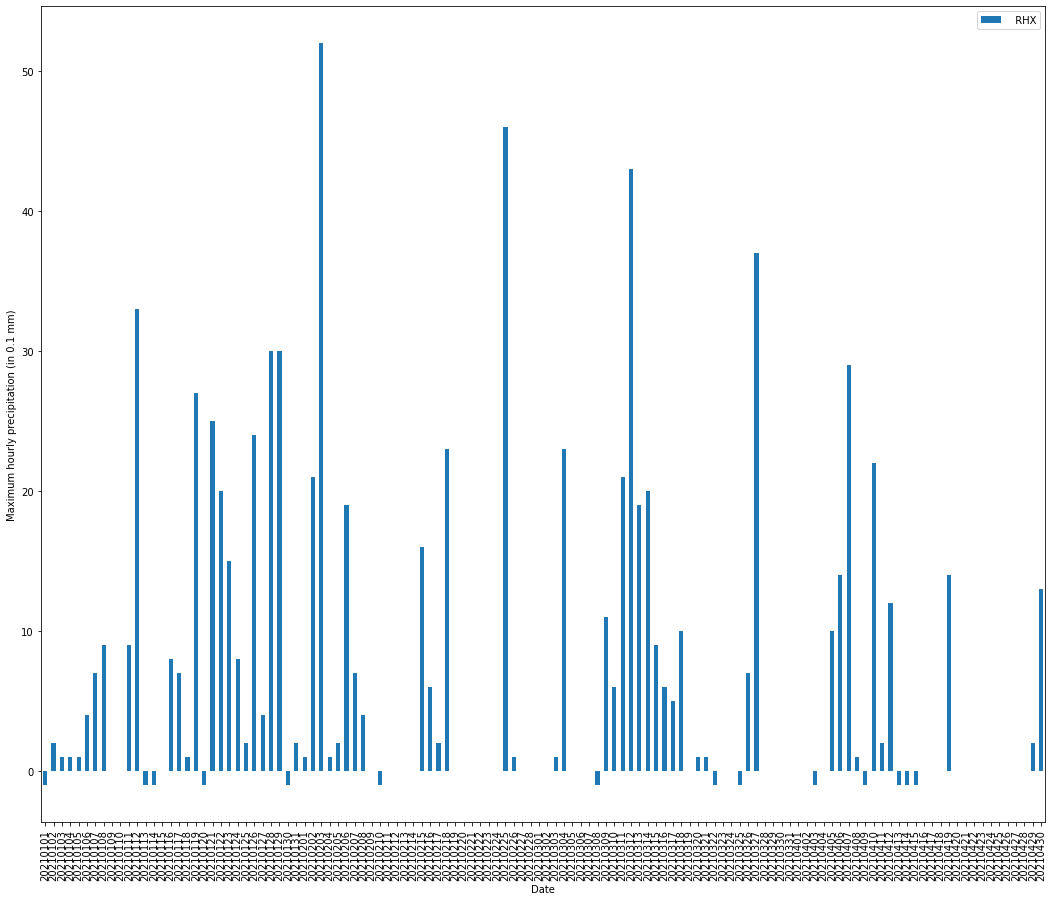

In [155]:
jan_apr_2021.plot.bar(x='YYYYMMDD', y='  RHX', figsize=(18,15))
plt.ylabel('Maximum hourly precipitation (in 0.1 mm)')
plt.xlabel('Date')

I checked what the barplot looked like when I rotated the plot. However, since there is so much data it still looks too crowded. When we look at one year, divided into periods of 4 months, we will look at the barplot horizontally.

Text(0.5, 0, 'Date')

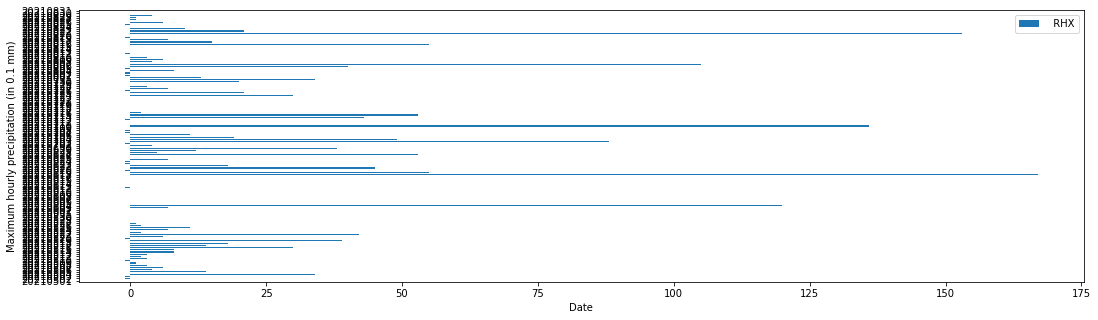

In [156]:
may_aug_2021.plot.barh(x='YYYYMMDD', y='  RHX', figsize=(18,5))
plt.ylabel('Maximum hourly precipitation (in 0.1 mm)')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

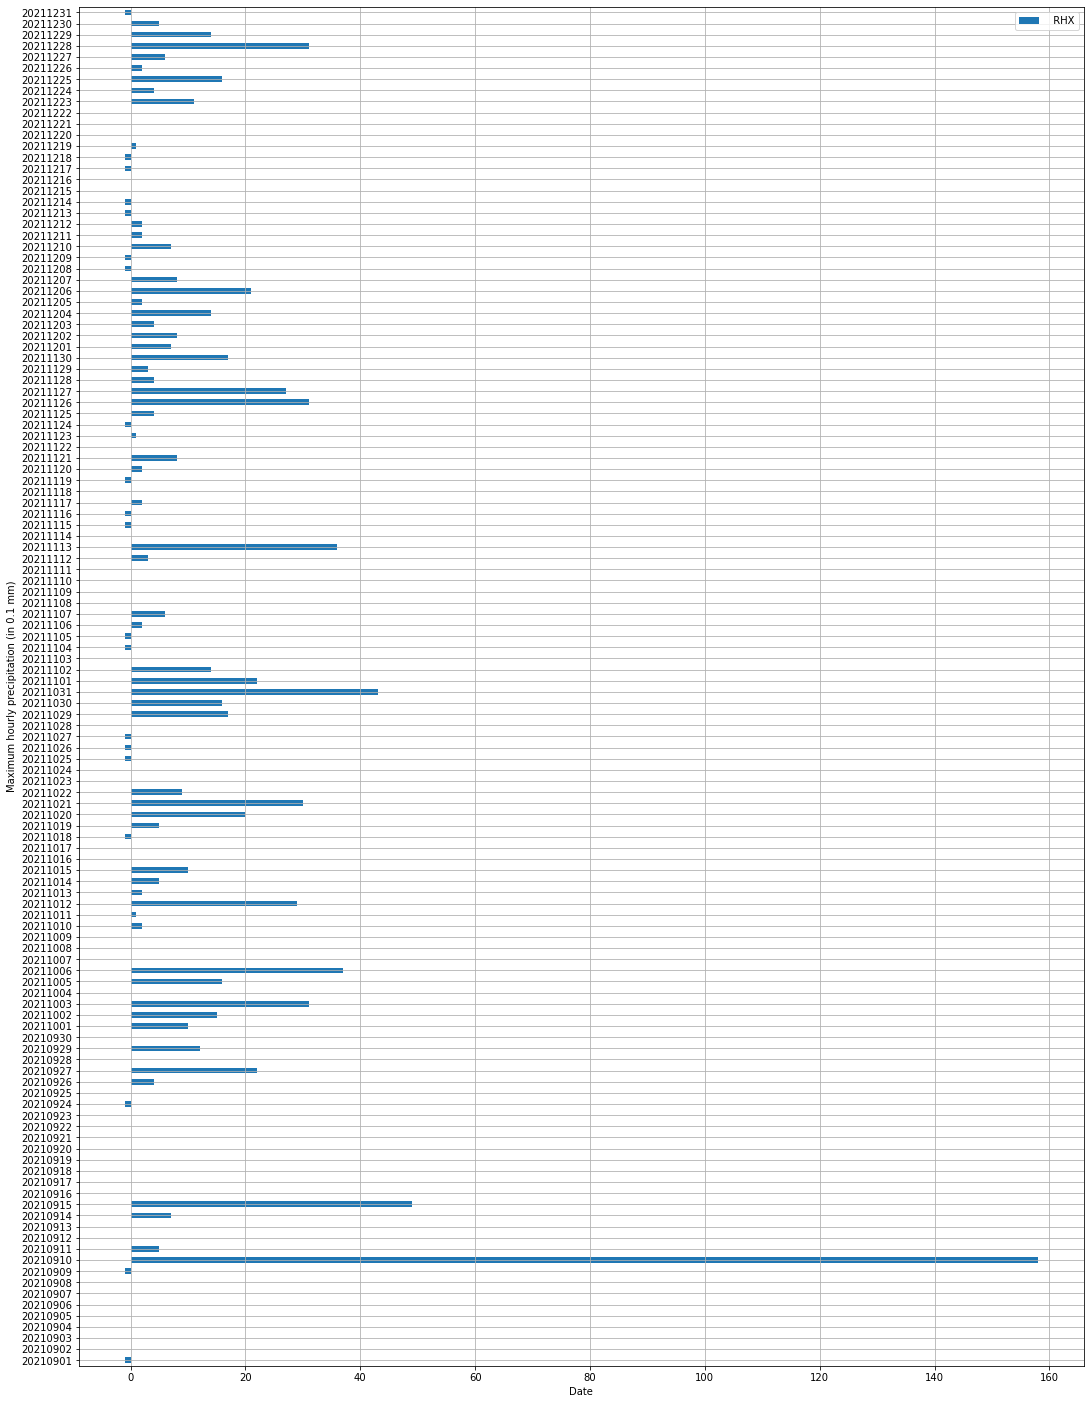

In [157]:
sep_dec_2021.plot.barh(x='YYYYMMDD', y='  RHX', grid = True, figsize=(18,25))
plt.ylabel('Maximum hourly precipitation (in 0.1 mm)')
plt.xlabel('Date')

--

In [158]:
rain[' RHXH'].value_counts()

1     909
17     45
14     39
3      36
13     35
24     35
16     34
12     33
5      31
18     31
21     31
22     30
2      30
7      30
11     28
10     28
15     28
9      28
19     27
23     26
4      26
8      24
6      23
20     21
Name:  RHXH, dtype: int64

We will later on change the RHX values from 19.00 (7.00 PM) until 7.00 (7 AM), so the value counts for a lot of values will change. 

## Data Preparation

Since the RHX is counted in 0.1mm, we multiply it by 10 to get value to 1 mm<br>
The column names might be confusing, so we change them<br>

In [159]:
rain = rain.rename(columns={"# STN": "Weatherstation", "YYYYMMDD": "Date", "  RHX": "Max hourly precipitation", " RHXH": "Hour of max precipitation"})
rain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,20180101,21,16
1,370,20180102,10,5
2,370,20180103,37,4
3,370,20180104,5,15
4,370,20180105,10,4
...,...,...,...,...
1603,370,20220523,83,17
1604,370,20220524,31,13
1605,370,20220525,-1,1
1606,370,20220526,0,1


In [160]:
#rain = rain.astype({"Weatherstation" : "category", "Hour of max precipitation" : "category"})
rain['Date'] = rain['Date'].apply([lambda x: pd.to_datetime(f"{x}"[:4] + "-" + f"{x}"[4:6] + "-" + f"{x}"[6:], format='%Y-%m-%d')])
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Weatherstation             1608 non-null   int64         
 1   Date                       1608 non-null   datetime64[ns]
 2   Max hourly precipitation   1608 non-null   int64         
 3   Hour of max precipitation  1608 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 50.4 KB


In [161]:
rain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,2018-01-01,21,16
1,370,2018-01-02,10,5
2,370,2018-01-03,37,4
3,370,2018-01-04,5,15
4,370,2018-01-05,10,4
...,...,...,...,...
1603,370,2022-05-23,83,17
1604,370,2022-05-24,31,13
1605,370,2022-05-25,-1,1
1606,370,2022-05-26,0,1


In [162]:
rain['Max hourly precipitation'] = 10 * rain['Max hourly precipitation']
rain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,2018-01-01,210,16
1,370,2018-01-02,100,5
2,370,2018-01-03,370,4
3,370,2018-01-04,50,15
4,370,2018-01-05,100,4
...,...,...,...,...
1603,370,2022-05-23,830,17
1604,370,2022-05-24,310,13
1605,370,2022-05-25,-10,1
1606,370,2022-05-26,0,1


In [163]:
rain['Max hourly precipitation'] = rain['Max hourly precipitation'].replace(-10, 0)
rain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,2018-01-01,210,16
1,370,2018-01-02,100,5
2,370,2018-01-03,370,4
3,370,2018-01-04,50,15
4,370,2018-01-05,100,4
...,...,...,...,...
1603,370,2022-05-23,830,17
1604,370,2022-05-24,310,13
1605,370,2022-05-25,0,1
1606,370,2022-05-26,0,1


We want to have the Max hourly precipitation in 1 mm instead of 0.1 mm, so we multiply this column by 10. 

In [164]:
rain['Max hourly precipitation'].unique()

array([ 210,  100,  370,   50,   40,    0,   90,  280,  240,  200,  220,
         60,  120,  330,   30,  160, 1050,  170,   80,   20,  130,  140,
        180,  110,  260,  150,   10, 1010,  460,  720,  530, 1410,  740,
        570,  390,  340,  290,  540,   70,  580,  350,  850,  300,  380,
        360,  230,  250,  890,  650, 1200, 1240,  770,  270,  310,  480,
        690,  190,  560,  590, 1020,  400,  610, 1260, 1780,  520,  970,
        320,  430,  420, 1670,  550,  450,  880,  490, 1360, 1530, 1580,
        410,  500,  510,  830], dtype=int64)

Check if really all -10 is removed. There are no more -10 values in the Max hourly precipitation column.

In [165]:
non_working_hours = rain[(rain['Hour of max precipitation'] > 18) | (rain['Hour of max precipitation'] < 8)]
non_working_hours

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
1,370,2018-01-02,100,5
2,370,2018-01-03,370,4
4,370,2018-01-05,100,4
6,370,2018-01-07,0,1
7,370,2018-01-08,0,1
...,...,...,...,...
1601,370,2022-05-21,0,1
1602,370,2022-05-22,0,1
1605,370,2022-05-25,0,1
1606,370,2022-05-26,0,1


If we look at only the working hours, we can see there are only 353 rows. So there was a lot of precipitation before and after working hours.

In [166]:
non_working_hours['Hour of max precipitation'].unique()

array([ 5,  4,  1, 21, 23, 22,  3, 19, 20,  6,  2,  7, 24], dtype=int64)

In [167]:
non_working_hours['Max hourly precipitation'] = 0

In [168]:
non_working_hours[non_working_hours['Hour of max precipitation'] == 24]

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
111,370,2018-04-22,0,24
118,370,2018-04-29,0,24
128,370,2018-05-09,0,24
218,370,2018-08-07,0,24
221,370,2018-08-10,0,24
301,370,2018-10-29,0,24
348,370,2018-12-15,0,24
364,370,2018-12-31,0,24
380,370,2019-01-16,0,24
390,370,2019-01-26,0,24


In [169]:
working_hours = rain[(rain['Hour of max precipitation'] <= 18) & (rain['Hour of max precipitation'] >= 8)]
working_hours


,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,2018-01-01,210,16
3,370,2018-01-04,50,15
5,370,2018-01-06,40,14
9,370,2018-01-10,90,8
15,370,2018-01-16,240,10
...,...,...,...,...
1596,370,2022-05-16,230,11
1599,370,2022-05-19,420,12
1600,370,2022-05-20,150,13
1603,370,2022-05-23,830,17


In [170]:
frames = [working_hours, non_working_hours]

# For modelling
baserain = rain.copy()
baserain = baserain.set_index(baserain['Date'], drop = False)
baserain.index = pd.DatetimeIndex(baserain.index).to_period('D')

rain = pd.concat(frames)
rain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
0,370,2018-01-01,210,16
3,370,2018-01-04,50,15
5,370,2018-01-06,40,14
9,370,2018-01-10,90,8
15,370,2018-01-16,240,10
...,...,...,...,...
1601,370,2022-05-21,0,1
1602,370,2022-05-22,0,1
1605,370,2022-05-25,0,1
1606,370,2022-05-26,0,1


In [171]:
rain.sort_index(inplace = True)

# moet nog op datum sorteren, 2018-01-03 staat wel in de dataset, maar is verplaatst.

In [172]:
rain[rain["Date"] == '2018-01-03']

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
2,370,2018-01-03,0,4


2018-01-03 is in de dataset, but it is moved somewhere else in the dataset

In [173]:
rain = rain.set_index(rain['Date'], drop = False)
rain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
Date,,,,
2018-01-01,370,2018-01-01,210,16
2018-01-02,370,2018-01-02,0,5
2018-01-03,370,2018-01-03,0,4
2018-01-04,370,2018-01-04,50,15
2018-01-05,370,2018-01-05,0,4
...,...,...,...,...
2022-05-23,370,2022-05-23,830,17
2022-05-24,370,2022-05-24,310,13
2022-05-25,370,2022-05-25,0,1


In [174]:
pd.date_range(start = '2018-01-01', end = '2022-05-27').difference(rain.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

We now check if there is any missing dates, this is not true. 

In [175]:
rain.index = pd.DatetimeIndex(rain.index).to_period('D')
rain.index

PeriodIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
             '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
             '2018-01-09', '2018-01-10',
             ...
             '2022-05-18', '2022-05-19', '2022-05-20', '2022-05-21',
             '2022-05-22', '2022-05-23', '2022-05-24', '2022-05-25',
             '2022-05-26', '2022-05-27'],
            dtype='period[D]', name='Date', length=1608)

We change the datetime to period, because when modeling this this works better. Now we will look at if the period is set.

# Modelling

In [176]:
import statsmodels
import statsmodels.api as sm
import itertools
import warnings

# Function for fitting model and returning the results object
def FitModel(param, seasonalParam):
    saim = sm.tsa.statespace.SARIMAX(rain[['Max hourly precipitation']],
                                order=param,
                                seasonal_order=seasonalParam,
                                enforce_stationarity=False,
                                enforce_invertibility=False,
                                freq='D')

    return saim.fit()

Importing libraries and defining the model.

In [177]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonalPdq = [(x[0], x[1], x[2], 12) for x in pdq]

results = dict()
# Run through every pdq variant
for param in pdq:
#     Run through every seaonsal PDQ variant aswell
    for seasonalParam in seasonalPdq:
#             Store the results in dict
        results[f"{param}-{seasonalParam}"] = FitModel(param, seasonalParam)

Tuning the hyper parameters

In [178]:
# Set AIC results in dataframe for easy readability
resultsdf = pd.DataFrame(columns=['params', 'AIC'])
for name, result in results.items():
    resultsdf = resultsdf.append({'params': name, 'AIC': result.aic}, ignore_index=True)

resultsdf.sort_values('AIC', ascending=True).head(5)

,params,AIC
47,"(1, 0, 1)-(1, 1, 1, 12)",19902.277257
15,"(0, 0, 1)-(1, 1, 1, 12)",19903.728267
63,"(1, 1, 1)-(1, 1, 1, 12)",19906.886063
43,"(1, 0, 1)-(0, 1, 1, 12)",19910.939015
11,"(0, 0, 1)-(0, 1, 1, 12)",19912.622467


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7350      0.142      5.175      0.000       0.457       1.013
ma.L1         -0.6735      0.157     -4.278      0.000      -0.982      -0.365
ar.S.L12       0.0808      0.010      8.486      0.000       0.062       0.099
ma.S.L12      -1.0000      0.008   -128.656      0.000      -1.015      -0.985
sigma2      1.639e+04   4.76e-07   3.44e+10      0.000    1.64e+04    1.64e+04


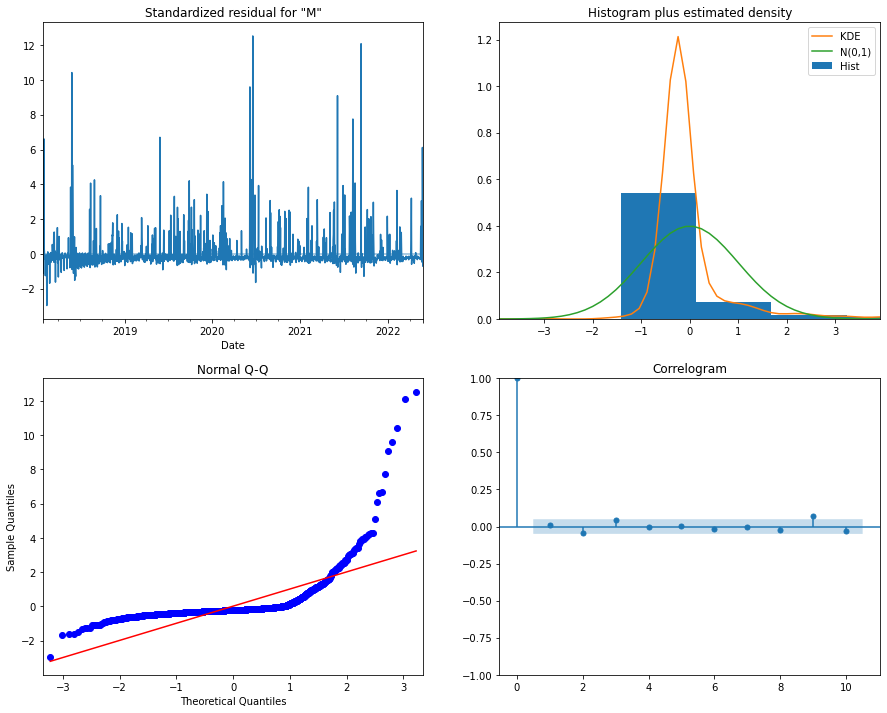

In [179]:
print(results['(1, 0, 1)-(1, 1, 1, 12)'].summary().tables[1])
results['(1, 0, 1)-(1, 1, 1, 12)'].plot_diagnostics(figsize=(15, 12))
plt.show()

Standard residual graph:
This graph shows the difference between observed and expected values. This means that there are an incredible amount of missobservations. Which means our prediction will be very innacurate and insecure.

Histogram plus estimated density:
The values we have in our dataset are getting compared to the normal standard deviation. This means all data errors are happening in the middle of our dataset.

Normal Q-Q:
The blue dots are supposed the normal distribution, you can see that the extreme values are very off from the normal distribution. This means that the prediction is very off in the extreme values. Which is to be expected, since some days have incredible amount of rain and some days have very little amount of rain.

In [180]:
rain[['Max hourly precipitation']].describe()

,Max hourly precipitation
count,1608.000000
mean,39.371891
std,128.426080
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1780.000000


As you can see in the table above the mean is really low, which is 39 millimeters and the standard deviation is very high with 128 millimeters. This means that there is a lot of fluctuation between the data. Everything below 75% of the data is 0, which means that there is no rain in 75% of the days. Which makes it very hard for us to predict the data. 

In [181]:
model = results['(1, 1, 1)-(1, 1, 1, 12)']

In [182]:
pred = model.get_prediction(start=pd.to_datetime('2022-01-01'), dynamic=False)
pred_ci = pred.conf_int()

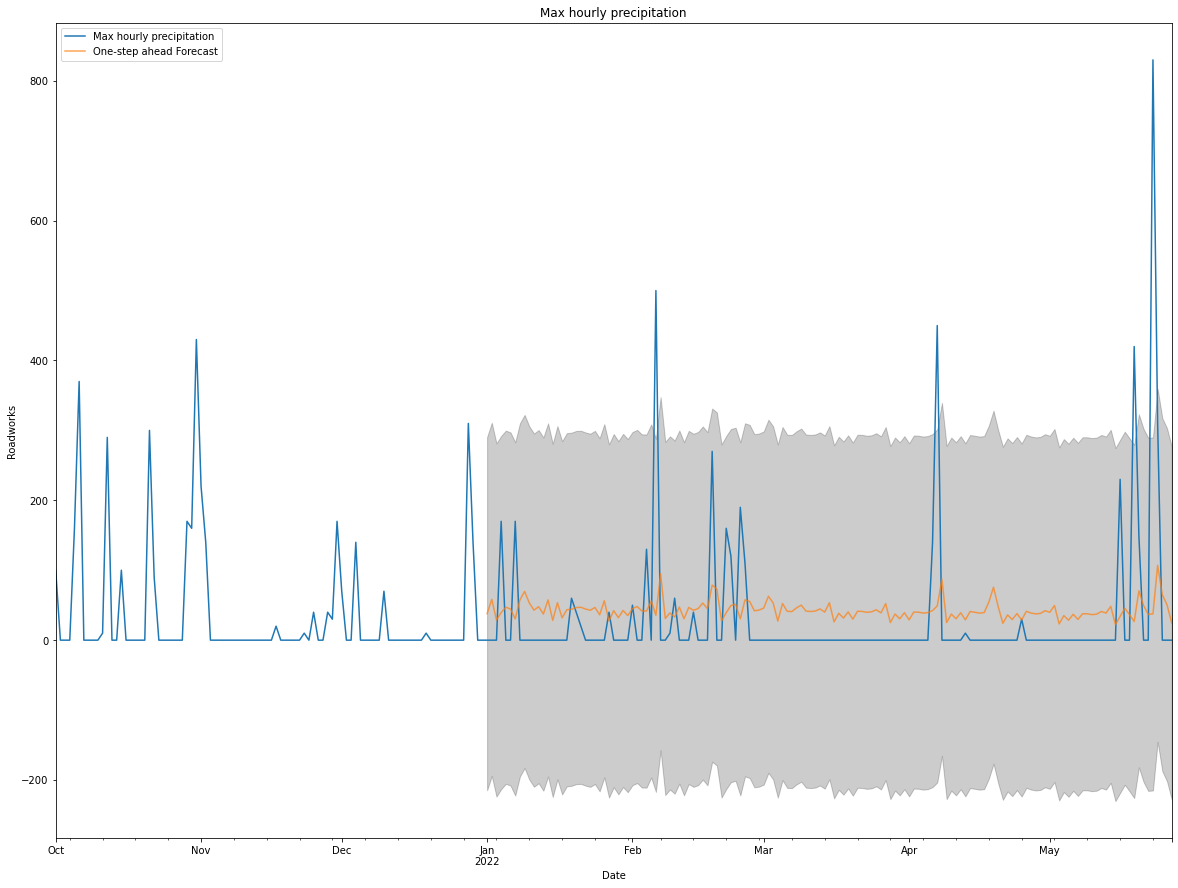

In [183]:
# Show reference data
ax = rain[['Max hourly precipitation']]['2021-10':].plot(label='observed', figsize=(20, 15))
# Show predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
# Show confidence of the model's prediction
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Roadworks')
ax.set_title('Max hourly precipitation')
plt.legend()

plt.show()

When using one step ahead forecasting, it is seen that the model performs extremely poorly. As we've seen in the 4 graphs above, this was to be expected. The model is extremely insecure, it is unable to predict the extreme values. Also because there is many low values in the graph, it fluctuates a lot. Which causes the prediction not to be able to predict these unpredictable spikes and drops.

In [194]:
pred_date = '2022-01-01'
pred_dynamic = model.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

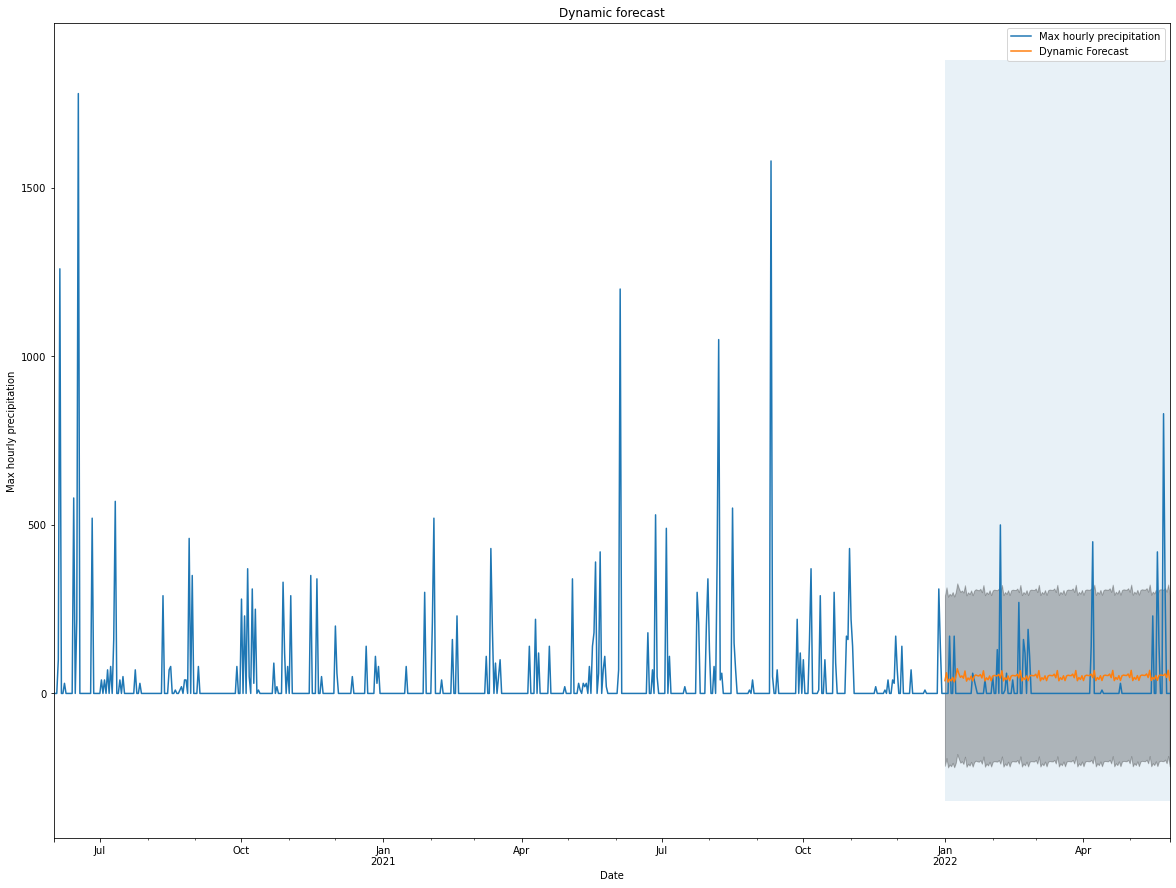

In [196]:
# Show reference data
ax = rain[['Max hourly precipitation']]['2020-6':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
# Show predicted values
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
# Show confidence of the model's prediction
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(pred_date), rain[['Max hourly precipitation']].index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Max hourly precipitation')
ax.set_title('Dynamic forecast')

plt.legend()
plt.show()

As you can see in the graph above the model is really insecure and can't predict properly. This is caused by the many low values and the extreme spikes. Which is to be expected, because the data is very unpredictable and has spikes and low days.

## Using all hours

In [187]:
baserain

,Weatherstation,Date,Max hourly precipitation,Hour of max precipitation
Date,,,,
2018-01-01,370,2018-01-01,210,16
2018-01-02,370,2018-01-02,100,5
2018-01-03,370,2018-01-03,370,4
2018-01-04,370,2018-01-04,50,15
2018-01-05,370,2018-01-05,100,4
...,...,...,...,...
2022-05-23,370,2022-05-23,830,17
2022-05-24,370,2022-05-24,310,13
2022-05-25,370,2022-05-25,0,1


Double checking if the removed rain is back in the dataset.

In [188]:
basesaim = sm.tsa.statespace.SARIMAX(baserain[['Max hourly precipitation']],
                                order=(1,0,1),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
basemodel = basesaim.fit()

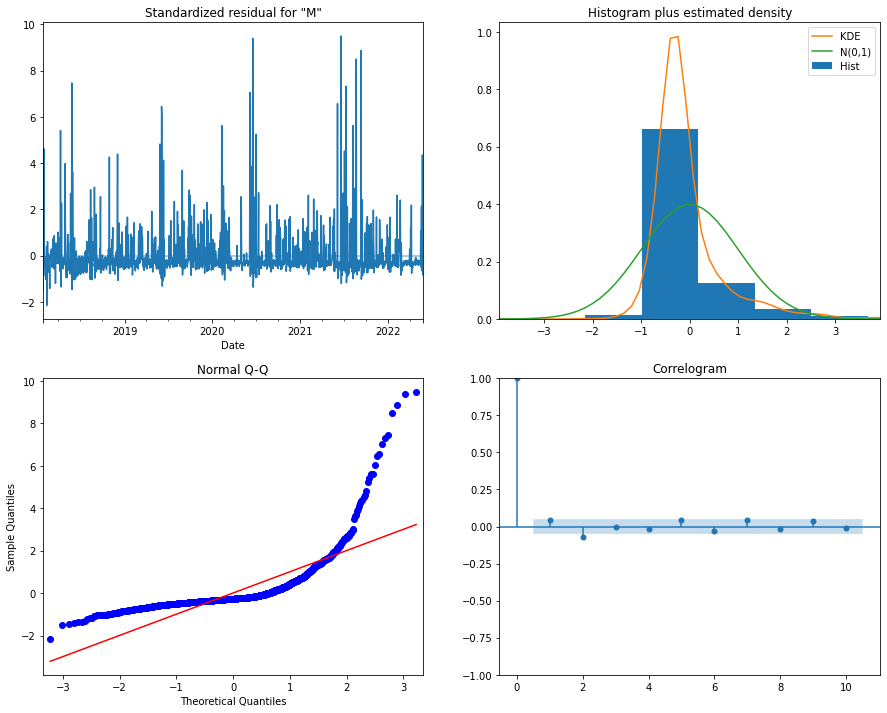

In [189]:
basemodel.plot_diagnostics(figsize=(15, 12))
plt.show()

In [190]:
pred_date = '2022-01-01'
pred_dynamic = basemodel.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

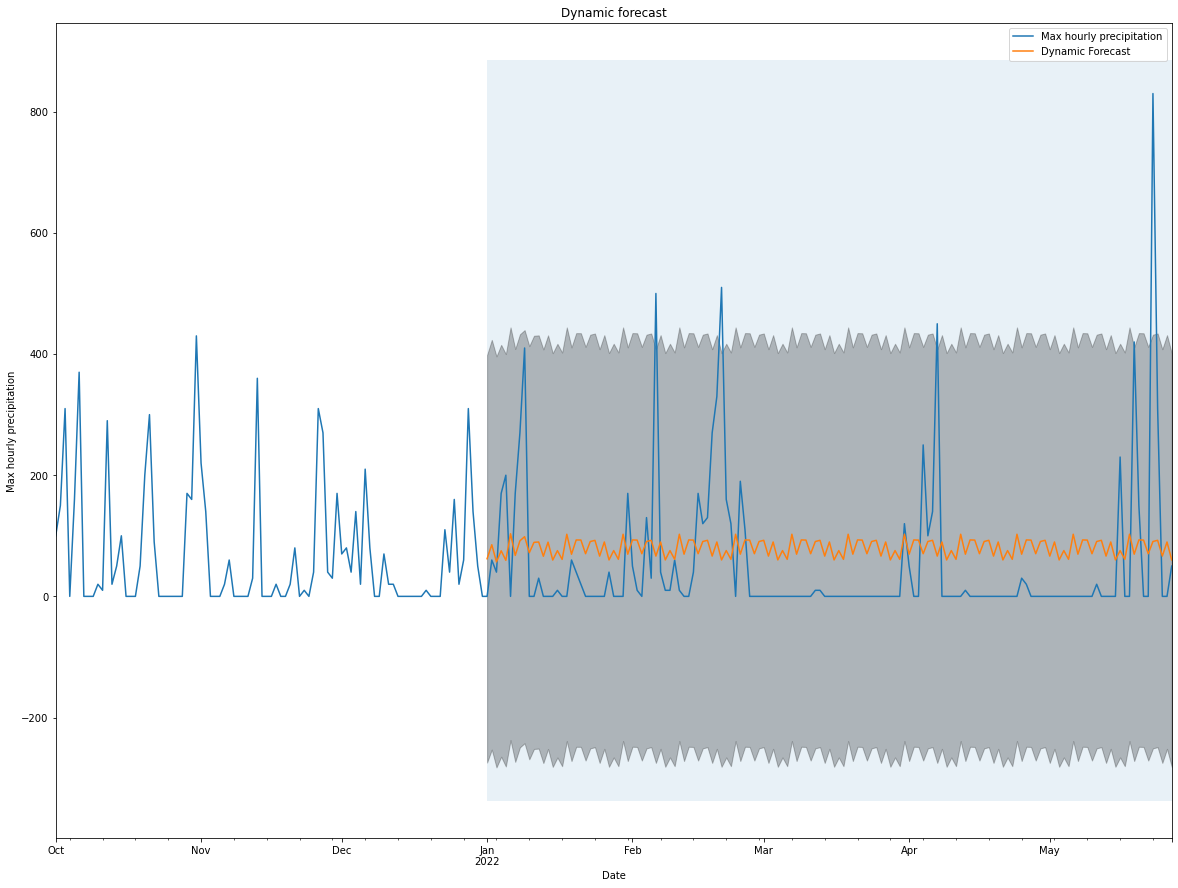

In [191]:
# Show reference data
ax = baserain[['Max hourly precipitation']]['2021-10':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)
# Show predicted values
ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
# Show confidence of the model's prediction
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(pred_date), baserain[['Max hourly precipitation']].index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Max hourly precipitation')
ax.set_title('Dynamic forecast')

plt.legend()
plt.show()

Even with all the data, the prediction is really insecure and not accurate at all. Which means, we either need more consistent data or more datapoints in general to generate a prediction. I think the cause of the predication being this bad is because of the many spikes and the many low values.

# Evaluation

We've kept our scope small and decided to only use data from Eindhoven. In case the data is valuable to us and worth the effort, we can broaden the scope and decide to predict it based on more info. Also JUGO has some clients in Eindhoven, which is why we've chosen the data from this city. We've also filtered out the non working hours, since this is invaluable for JUGO.

As we've seen the data for the rain isn't incredibly valuable. The data consists maximum hourly per precipitation, which means we can't predict what times will be too rainy. We could only predict the days which is also not that valuable for us. 

Even though we are able to see what days would be the worst to travel on, this is invaluable, since rain has no correlation to days. Altough rain has correlation to seasons, we could conclude which timeframes would be the worst to travel in.

ARIMA, short for 'AutoRegressive Integrated Moving Average', is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values (Phrabakaran, 2021). But we've used SARIMA, and the S in front of ARIMA stands for seasonal. 

And amount of rain correlates to the seasons, there is more total rain fallen in the summer, since the warmth, because warmer temperatures allow the air to hold more moisture. Which you can also see in the graph below at the beginning of the graph, which is june. You can also see this in the middle of the graph through the months of June to September. Also spring and winter feature many days with precipitation, which you can also see in the graph below. Which are in the months December to June.


We've used ARIMA three times in this notebook, we've used it twice on the data with only the working hours and once with all the data. First to predict the future based on one step ahead, second to predict the future based on previous data and thirdly we've predicted the future based on previous data but with all the data.

The model we've created for each model wasn't good because there are way too many spikes. Also the extreme values are very often off by a lot in comparison to the expected values. In all three of the standarized residual graph the value goes over 10, which is a lot. This means that the real value is way off than the predicted value. 

In the forecasting graphs (below is an example of the forecasting graph with the working hours) we can see that the model is very insecure. This means that the predicted value can't properly correlate the variation in the data. As you can tell because the 2 lines are very far off from eachother. The main reasons for this is because the data is very volatile, as expected since it's rain. There are many days where it's raining a lot, and many days where it's not raining.

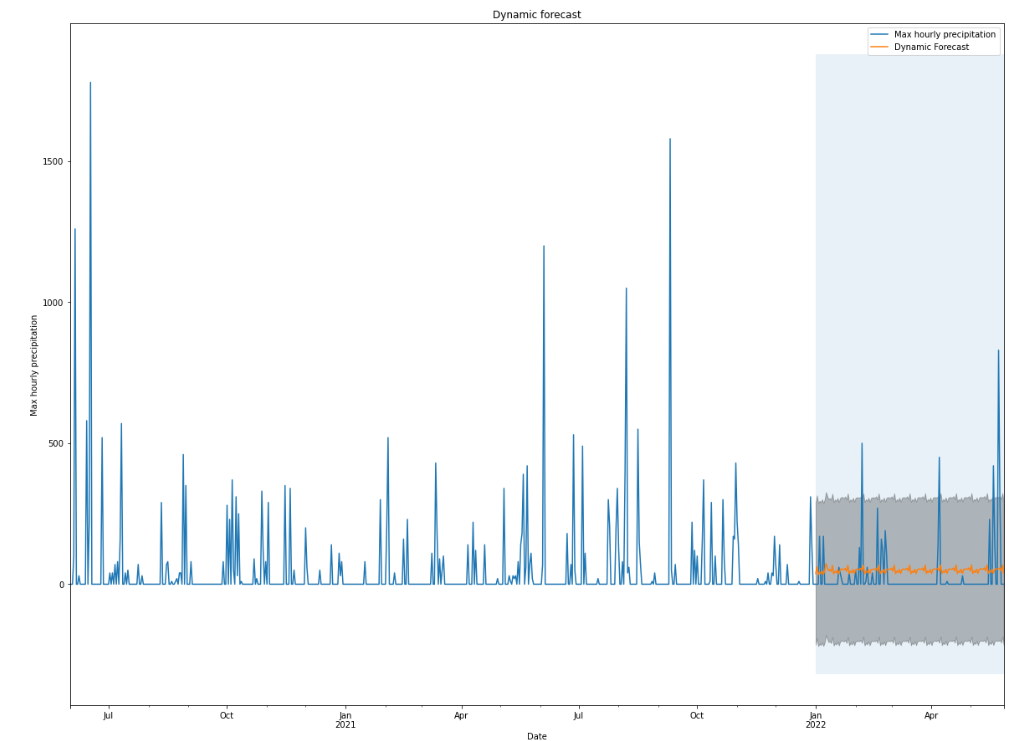

So unless we have more consistent data which shows rain per hour or minute, I don't suggest using ARIMA. The data is way too little and way too volatile. If we have datapoints per minute or even hour, we could train the model better, since the data wouldn't be so inconsistent (in comparison to data about maximum hourly per precipitation). Also we could easily see what season we're in, since some seasons are more rainier than others. But since we're looking at maximum hourly per precipitation, we can't even see a pattern in the data.

There are also many other resources, that predict the weather. Which would be easier to use than trying to predict it off this data. So we suggest that JUGO uses this instead of predicting the future based on this data. It's already public information for everyone and everyone uses weather forecasting applications. So this would be easier than predicting existing data over the internet, even though the data would be accurate. Unless JUGO wants to predict months ahead, using weather forecasting services that are already available are suggested.